In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [16]:
df = pd.read_csv("lithium dataset.csv")
df = df.drop(columns=["cathode material"])
df.head()

,Average Atomic Radius,Average Electronegativity,Thermal Conductivity (W/m K),Average Boiling Point,Fusion Heat (KJ/mol),Average Density,Specific Discharge Capacity at 25 Cycle(mAh g-1),Estimated Theoretical Capacity,Capacity Retention after 50 Cycles
0,119.060864,2.326218,66.249827,2069.992266,10.039863,5.864052,35.0,180.0,5.142857
1,119.060864,2.326218,66.249827,2069.992266,10.039863,5.864052,144.0,180.0,1.250000
2,119.060864,2.326218,66.249827,2069.992266,10.039863,5.864052,157.0,180.0,1.146497
3,119.060864,2.326218,66.249827,2069.992266,10.039863,5.864052,133.0,274.0,2.060150
4,119.060864,2.326218,66.249827,2069.992266,10.039863,5.864052,123.0,274.0,2.227642


Drop duplicates if any

In [13]:
df = df.drop_duplicates()
df.describe()

,Average Atomic Radius,Average Electronegativity,Thermal Conductivity (W/m K),Average Boiling Point,Fusion Heat (KJ/mol),Average Density,Specific Discharge Capacity at 25 Cycle(mAh g-1),Estimated Theoretical Capacity,Capacity Retention after 50 Cycles
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,104.563539,2.390121,35.986945,1435.297848,13.856738,4.315324,126.463636,213.526667,1.837326
std,21.312732,0.126686,18.485677,512.165432,13.877552,1.090689,37.039842,71.549018,1.199148
min,25.660985,2.160439,8.012073,79.652515,4.698259,2.395465,13.000000,84.000000,0.000000
25%,101.283082,2.290690,25.856487,1169.526378,5.923034,3.568470,105.000000,167.000000,1.270492
50%,107.844672,2.351544,32.115847,1383.421137,8.214903,4.144790,126.000000,170.000000,1.545455
75%,119.301847,2.516427,46.300126,1843.048299,12.279528,5.499451,146.000000,274.000000,2.098485
max,124.330738,2.741080,66.348432,2069.992266,60.498467,5.864052,256.000000,389.000000,13.076923


Define feature columns and target

In [18]:
feature_cols = [
    "Average Atomic Radius", "Average Electronegativity",
    "Thermal Conductivity (W/m K)", "Average Boiling Point",
    "Fusion Heat (KJ/mol)", "Average Density",
    "Specific Discharge Capacity at 25 Cycle(mAh g-1)",
    "Estimated Theoretical Capacity"
]
target_col = "Capacity Retention after 50 Cycles"
X = df[feature_cols]
y = df[target_col]

 Correlation matrix

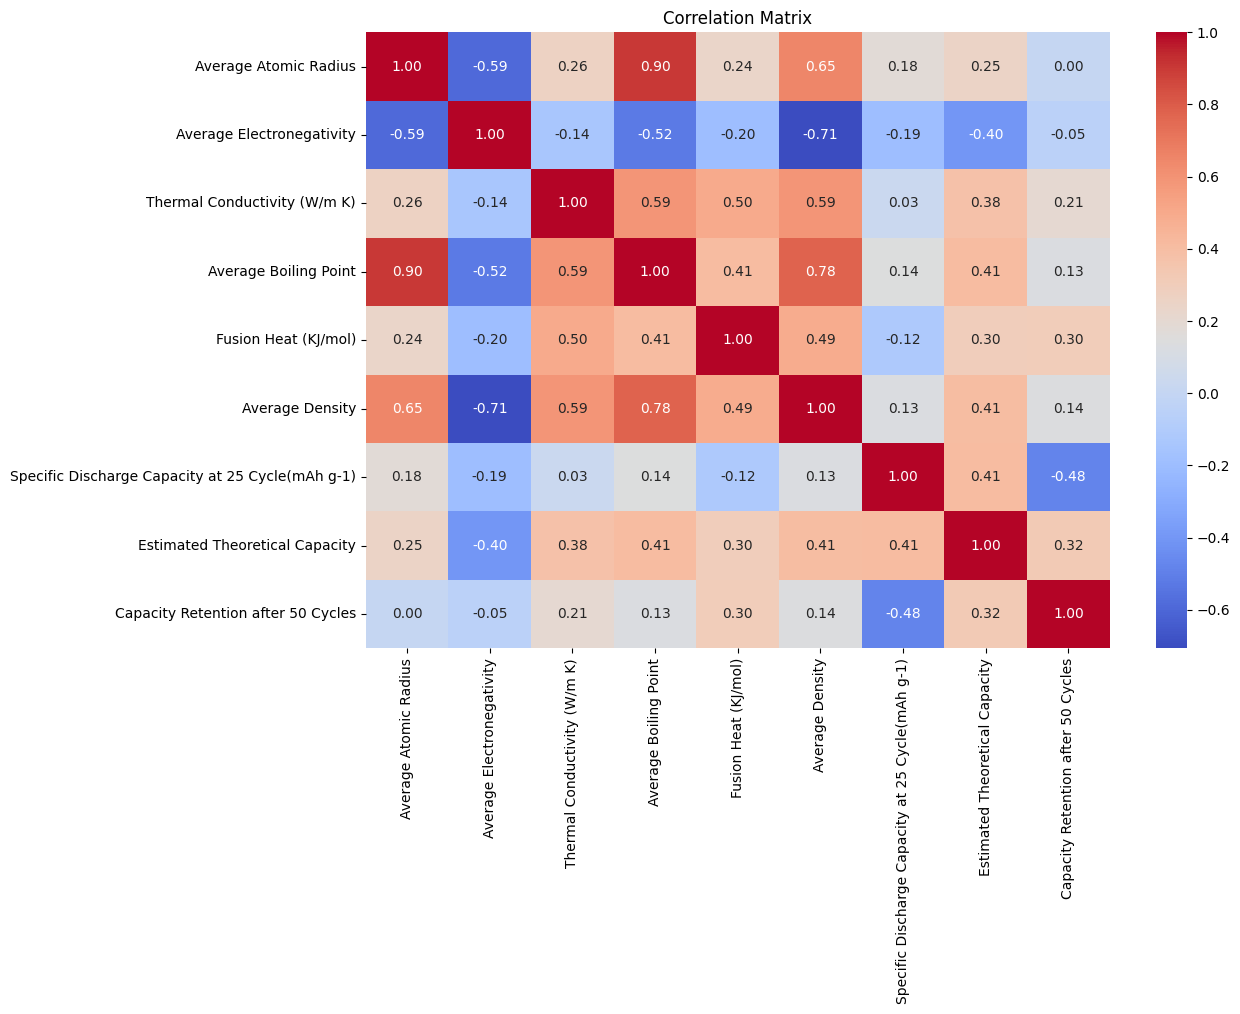

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Distribution of the target variable

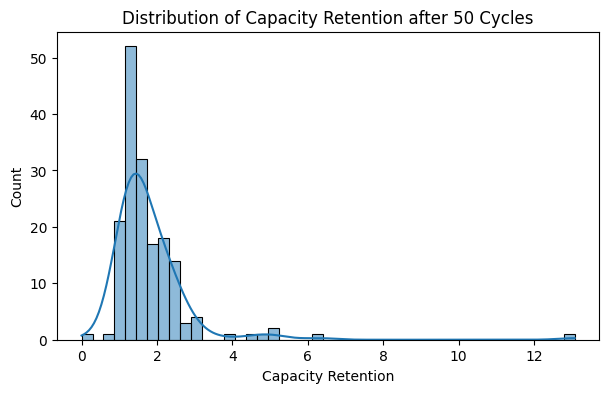

In [21]:
plt.figure(figsize=(7, 4))
sns.histplot(df["Capacity Retention after 50 Cycles"], kde=True)
plt.title("Distribution of Capacity Retention after 50 Cycles")
plt.xlabel("Capacity Retention")
plt.show()

Boxplot for outliers

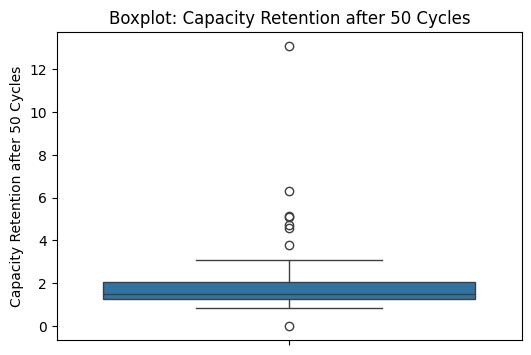

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Capacity Retention after 50 Cycles"])
plt.title("Boxplot: Capacity Retention after 50 Cycles")
plt.show()

Pairplot for selected important features

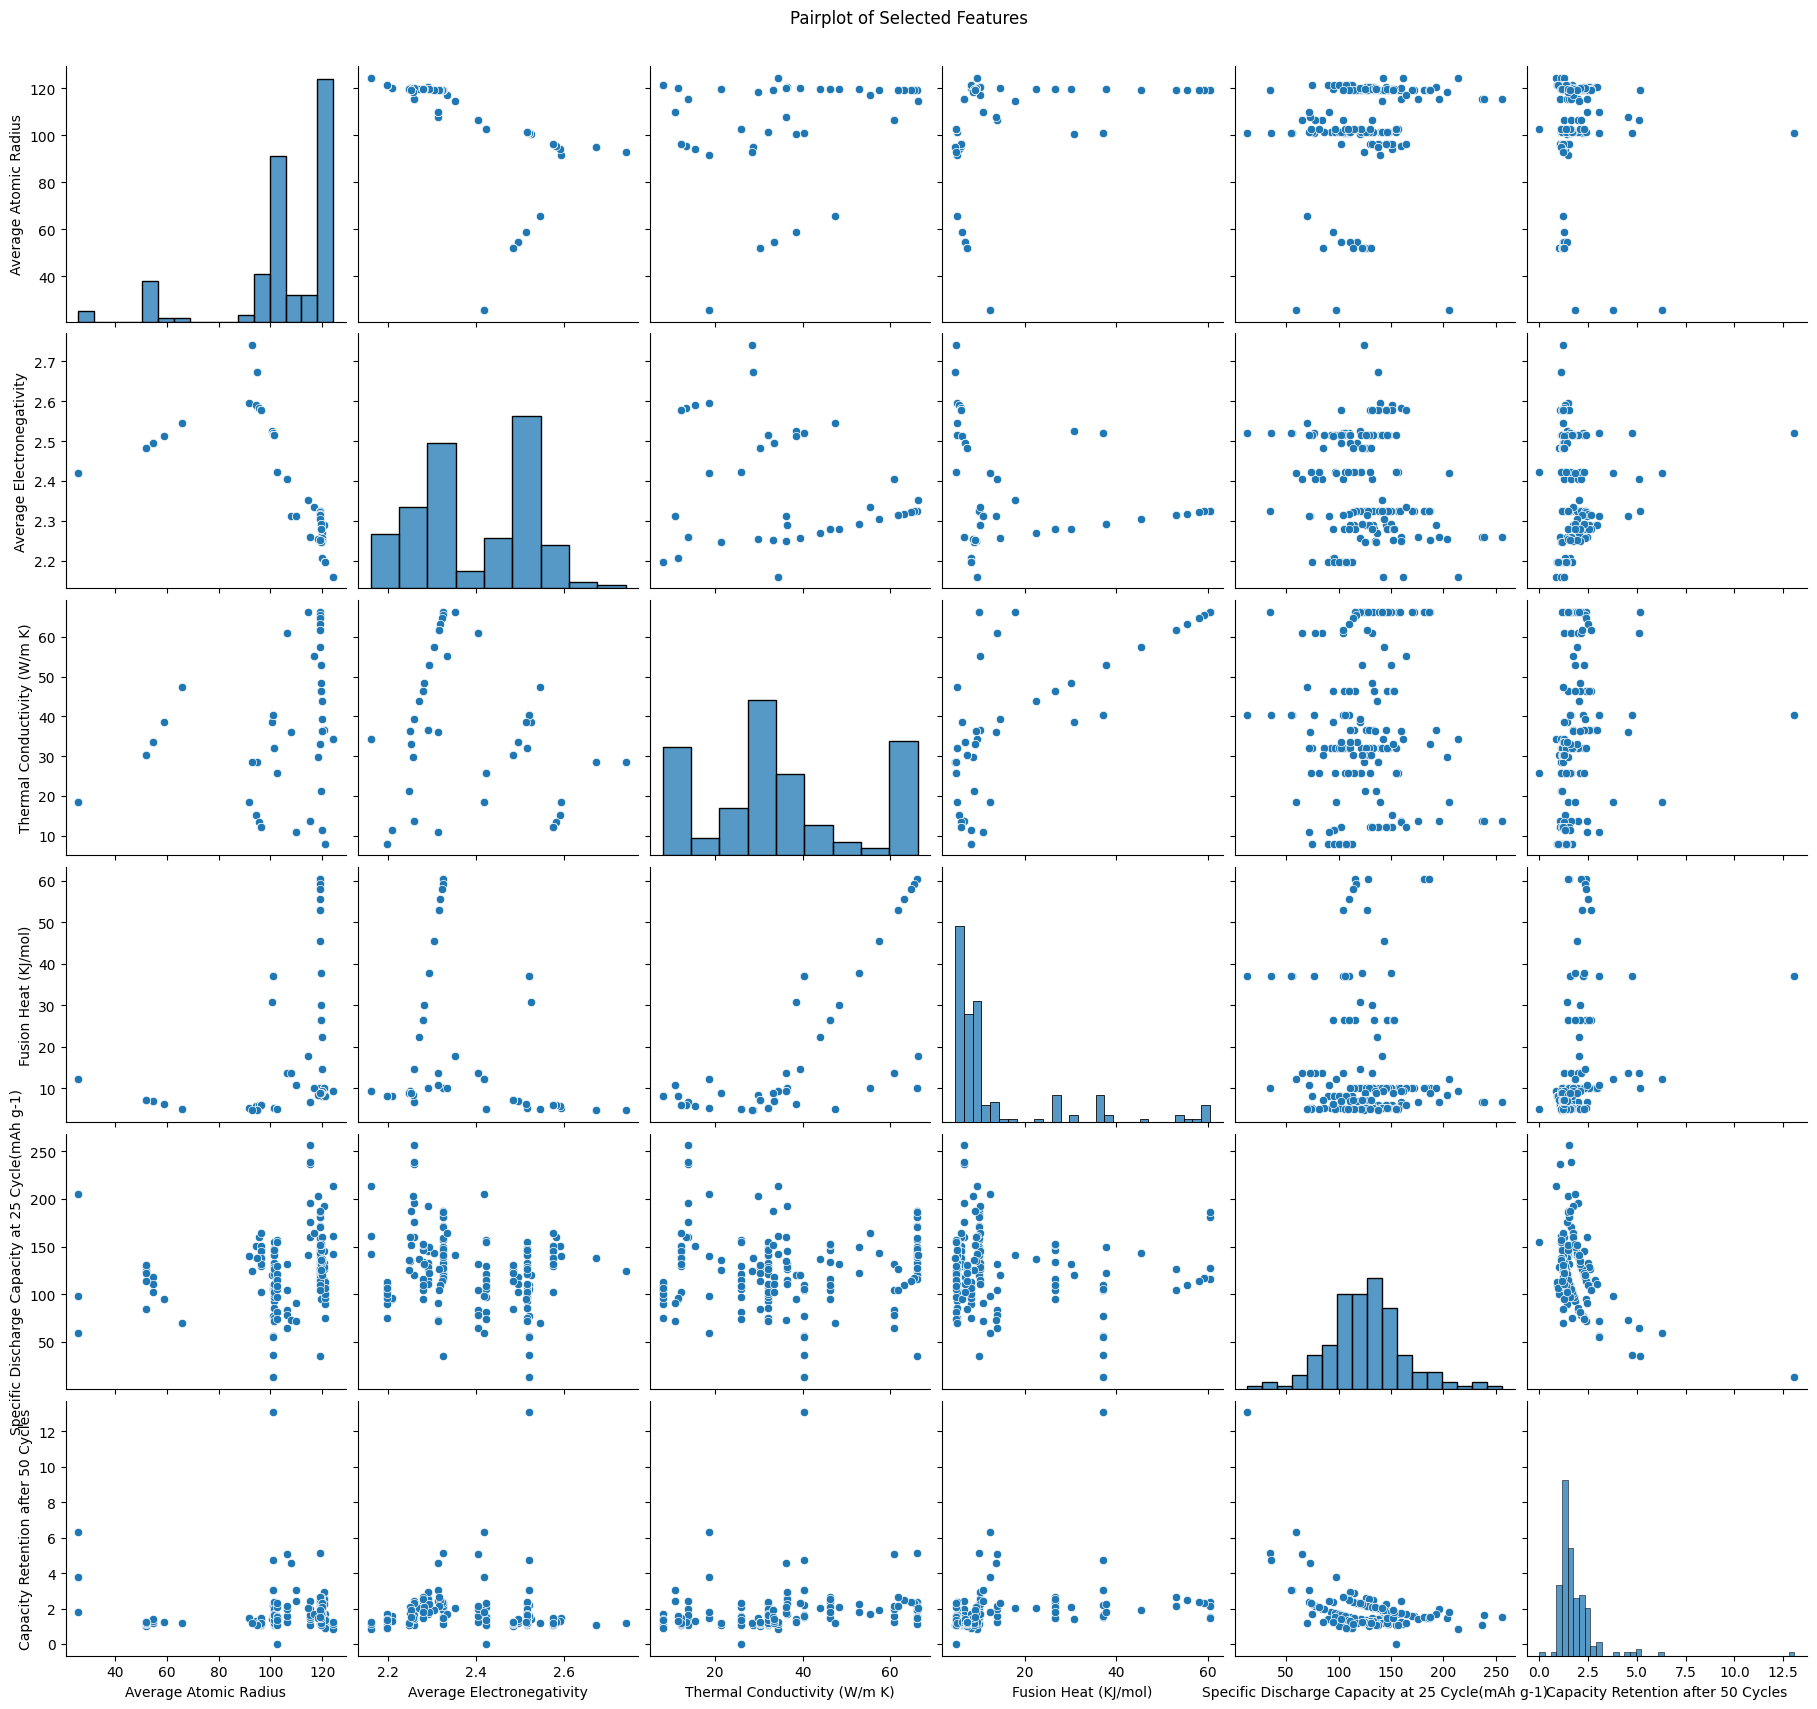

In [24]:
subset_cols = [
    "Average Atomic Radius", "Average Electronegativity",
    "Thermal Conductivity (W/m K)", "Fusion Heat (KJ/mol)",
    "Specific Discharge Capacity at 25 Cycle(mAh g-1)",
    "Capacity Retention after 50 Cycles"
]
sns.pairplot(df[subset_cols], height=2.8, aspect=1.1)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Use Random Forest Regressor

In [27]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Evaluate

In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

MAE: 0.171
RMSE: 0.425
R2 Score: 0.790


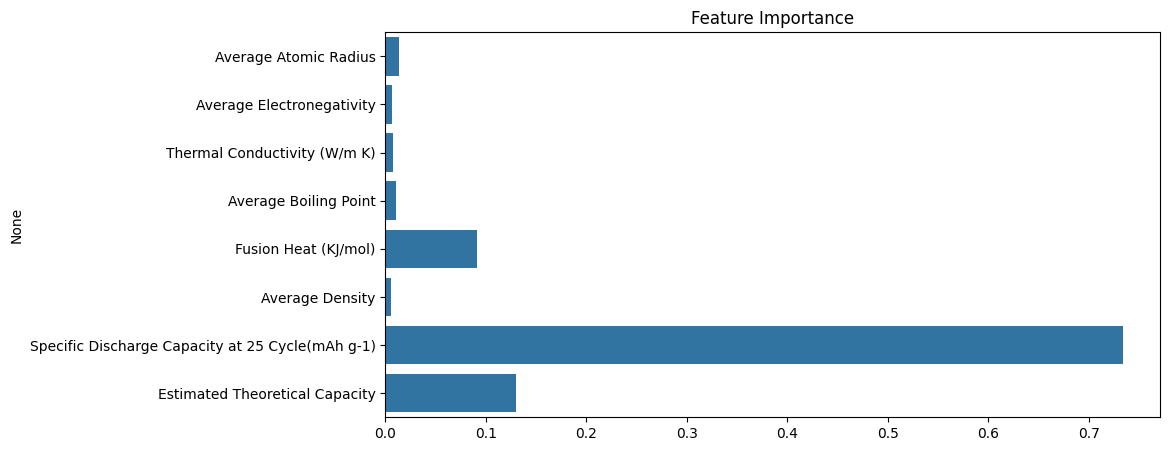

In [31]:
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.show()

In [40]:
import pickle
with open('Lithium model.pkl', 'wb') as file:
    pickle.dump(model, file)